# Digit Recognizer competetion

### Importing libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

# Turn off TensorFlow warning messages in program output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

### Data importing and visualization

In [3]:
# importing the data file
data = pd.read_csv('D:\\Not yours\\Digit Recognizer\\train.csv')

In [4]:
# getting shape of data
data.shape

(42000, 785)

In [5]:
# getting inforamation about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# check for null values
data.isnull().sum().sum()

0

In [7]:
# exploring head of data
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


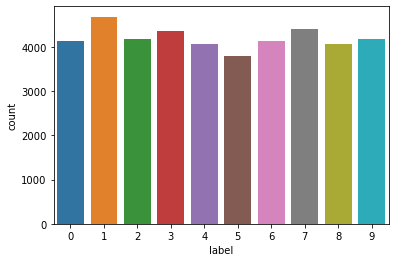

In [8]:
# exploring the labels of training data
sns.countplot(x = 'label',data = data)

In [9]:
# assigning the X and y from the imported file "data"
Y = data.iloc[:, 0].values
x = data.iloc[:, 1:].values

### Data preprocessing

In [10]:
# converting y from one column for all categories to one column for each category
# one-hot encoding
y = np_utils.to_categorical(Y)

In [11]:
# scaling the x values as its values from 0 to 255
X = x/255

In [12]:
# splitting the data to train and test with ratio 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
#Reshape the data to handle it like pictures with 28*28 
X_train_reshaped = X_train.reshape(-1,28,28,1)
X_test_reshaped = X_test.reshape(-1,28,28,1)

### Model building

In [14]:
# create a convolutional neural network model
CNN_model = Sequential()
# 1st convolutional layer
CNN_model.add(Conv2D(32, (3,3),input_shape = (28,28,1), activation = 'relu' ))
CNN_model.add(MaxPool2D(pool_size=(2,2)))
# 2nd convolutional layer
CNN_model.add(Conv2D(32, (3,3), activation = 'relu' ))
CNN_model.add(MaxPool2D(pool_size=(2,2)))

CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())

# fully connected network
CNN_model.add(Dense(128, activation = 'relu'))
CNN_model.add(Dense(y.shape[1], activation = 'softmax'))
CNN_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)             

In [15]:
#compile model
CNN_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
# fitting the model
CNN_model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=10, batch_size=100, verbose=2)


Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 4s - loss: 0.3317 - accuracy: 0.9014 - val_loss: 0.0925 - val_accuracy: 0.9714
Epoch 2/10
 - 2s - loss: 0.0945 - accuracy: 0.9699 - val_loss: 0.0625 - val_accuracy: 0.9804
Epoch 3/10
 - 2s - loss: 0.0663 - accuracy: 0.9791 - val_loss: 0.0538 - val_accuracy: 0.9842
Epoch 4/10
 - 2s - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0442 - val_accuracy: 0.9865
Epoch 5/10
 - 2s - loss: 0.0417 - accuracy: 0.9875 - val_loss: 0.0415 - val_accuracy: 0.9870
Epoch 6/10
 - 2s - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0537 - val_accuracy: 0.9826
Epoch 7/10
 - 2s - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0407 - val_accuracy: 0.9874
Epoch 8/10
 - 2s - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0389 - val_accuracy: 0.9883
Epoch 9/10
 - 2s - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0322 - val_accuracy: 0.9905
Epoch 10/10
 - 2s - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0321 - val_accuracy: 0.9911


In [17]:
# evaluating the model
scores = CNN_model.evaluate(X_test_reshaped, y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Baseline Error: 0.89%
